
# **Machine Learning project** 
데이터셋을 사용해서 만든 머신러닝의 예측 모델을 통한 성능 및 인사이트를 도출

---

# **🏆 Hypothesis of project**

##**멜버른 부동산가격은 부동산의 위치보다 부동산의 크기에 더 영향을 받는다**


## **데이터 선정 이유 및 문제 정의**
데이터 : Melbourne housing clearance data from Jan 2016 to 2018

링크 : https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

데이터 선정 이유 : 어떠한 특성들이 타겟에 영향을 주는지, 예측이 어떻게 되는지를 머신러닝을 이용하면 잘 도출 할 수 있다는걸 증명하기 좋은 데이터라고 생각.

문제 유형 : 회귀

## **데이터의 타겟, 평가지표, 베이스라인 선택**

타겟: Price (집값이 어떤 것에 영향을 받고, 앞으로의 집값 예측을 알아보기 위해 타겟 선정)

베이스 라인 모델 : Price의 평균

평가지표: RMSE


###**Features**

Price: Price in dollars

Rooms: Number of rooms

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area


In [9]:
#!pip install pandas-profiling==2.*

In [10]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

.











#**1. 데이터 훑어보기**



In [11]:
# 로컬에서 데이터 업로드
#from google.colab import files
#myfile = files.upload()

In [12]:
# csv로 데이터 불러오기
df= pd.read_csv("Melbourne_housing_FULL.csv")

In [13]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [14]:
df.shape

(34857, 21)

In [15]:
# 프로파일링

#from pandas_profiling import ProfileReport
#ProfileReport(df)

In [16]:
# Rooms와 Bedroom2의 correlation이 너무 높음. 같은 데이터라고 봐도 무방하기 때문에 Bedroom2 feature를 제거
df=df.drop(axis=1,columns='Bedroom2')

# Postcode는 숫자이지만 범주형 데이터이기 때문에 결측지 처리 후 object로 바꿈.

# Date는 datetime 유형으로 전처리 이후에 바꾸기 feature engineering을 위해서

# Bathroom ,Car, Yearbuilt,Bedroom2는 float이 아니라 integer여야 함 (결측지 처리 후 실행)

In [17]:
# 요약 통계
df.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [18]:
# BuildingArea와 Landsize가 0인 데이터

display(len(df[(df['BuildingArea'] == 0)]),len(df[(df['Landsize'] == 0)]))

76

2437

In [19]:
# BuildingArea와 Landsize는 집 크기,토지 크기이기 때문에 0일수가 없음 제거.

df=df[~(df['BuildingArea'] == 0)]
df=df[~(df['Landsize'] == 0)]
display(len(df[(df['BuildingArea'] == 0)]),len(df[(df['Landsize'] == 0)]))

0

0

In [20]:
# YearBuilt가 2019년 이후인 데이터

len(df[(df['YearBuilt'] >= 2019)])

2

In [21]:
# 2018년까지의 데이터이기 때문에 YearBuilt가 2019년 이후인 데이터가 존재 할 수 없음 제거.

df=df[~(df['YearBuilt'] >= 2019)]
len(df[(df['YearBuilt'] >= 2019)])

0

In [22]:
# reset index
df = df.reset_index()

In [23]:
df=df.drop(axis=1,columns='index')

#**2. 전처리**

##**2.1. 중복값**

In [24]:
# 중복값 확인

len(df[df.duplicated()==True]) 

1

In [25]:
# 중복값 처리

df=df.drop_duplicates()
len(df[df.duplicated()==True]) 

0

##**2.2. 결측치**

In [26]:
# 결측지 확인

df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7098
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8726
Landsize         11790
BuildingArea     20005
YearBuilt        18472
CouncilArea          3
Lattitude         7971
Longtitude        7971
Regionname           3
Propertycount        3
dtype: int64

In [27]:
# 수치형 데이터의 결측지에 중앙값 넣어주기 (평균보다 outlier에 민감하지 않기 때문)

df['Price']= df['Price'].fillna(df['Price'].median())
df['Distance']= df['Distance'].fillna(df['Distance'].median())
df['Landsize']= df['Landsize'].fillna(df['Landsize'].median())
df['BuildingArea']= df['BuildingArea'].fillna(df['BuildingArea'].median())
df['YearBuilt']= df['YearBuilt'].fillna(df['YearBuilt'].median())
df['Lattitude']= df['Lattitude'].fillna(df['Lattitude'].median())
df['Longtitude']= df['Longtitude'].fillna(df['Longtitude'].median())

In [28]:
# 범주형 데이터의 결측지에 최빈값 넣어주기
df['Car']= df['Car'].fillna(df['Car'].mode()[0])
df['Bathroom']= df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['Postcode']= df['Postcode'].fillna(df['Postcode'].mode()[0])
df['CouncilArea']= df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])
df['Regionname']= df['Regionname'].fillna(df['Regionname'].mode()[0])
df['Propertycount']= df['Propertycount'].fillna(df['Propertycount'].mode()[0])

In [29]:
# 결측지 처리 후 확인
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [30]:
# 결측지를 처리했으니 Bathroom,Car,YearBuilt 를 integer로 바꾸기

df['Bathroom']=df['Bathroom'].astype('int64')
df['Car']=df['Car'].astype('int64')
df['YearBuilt']=df['YearBuilt'].astype('int64')

# Postcode를 object로 바꾸기

df['Postcode']= df['Postcode'].astype('object')

##**2.3. 타겟분포 정규화**

In [31]:
# 타겟 정의

target='Price'

<Figure size 720x360 with 0 Axes>

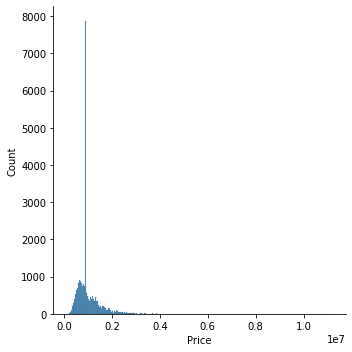

In [32]:
# 타겟 분포

plt.figure(figsize=(10,5))
sns.displot(data=df[target]); # 결측지의 median처리로 인해 세로축이 높아 이상하지만 타겟 분포가 right(positively) skewed인걸 확인

In [33]:
# 이상치(outlier) 제거

df['Price'] = df[df['Price'] < np.percentile(df['Price'], 99.5)]['Price']

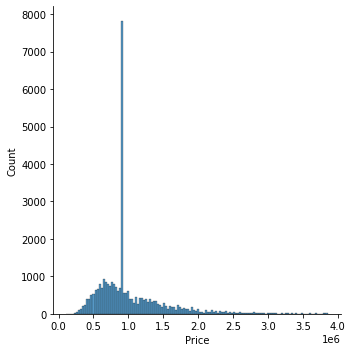

In [34]:
# 이상치(outlier) 제거 후 타켓 분포

sns.displot(data=df[target]); # 아직까지 정규분포가 형성 되지 않음

In [35]:
# 정규분포를 만들기 위해 log 변환

df['Price']=np.log1p(df['Price'])

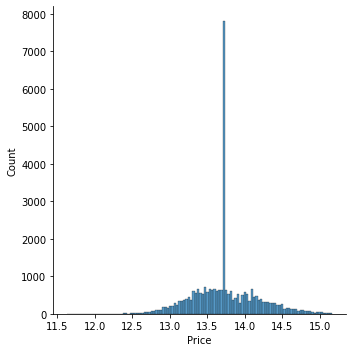

In [36]:
# 로그변환 후 타켓 분포

sns.displot(data=df[target]); # 전보단 정규분포에 가까워짐.

In [37]:
# 로그 변환 후 타겟값 결측지 확인

df[target].isnull().sum() #로그 변환 후 결측지가 생김

162

In [38]:
# 결측지를 median으로 대체 후 결측지 확인
df[target]= df[target].fillna(df[target].median())
df[target].isnull().sum()

0

##**2.4. Feature engineering**

In [39]:
# 날짜와 관련된 새로운 column들을 만들기 위해 object인 data를 datetime으로 바꾸기
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
# Year과 doy(day of year) 이라는 colunm 생성

df['Year'] = df['Date'].dt.year

df['doy'] = df['Date'].dt.dayofyear

In [41]:
# doy특성을 이용하여 season이라는 특성 생성

spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
#winter = else

v=[]
for i in df['doy']:

  if i in spring:
    season='spring'
  elif i in summer:
    season = 'summer'
  elif i in fall:
    season = 'fall'
  else:
    season = 'winter'
  v.append(season)  

df['season']= pd.Series(v)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32341
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         32341 non-null  object        
 1   Address        32341 non-null  object        
 2   Rooms          32341 non-null  int64         
 3   Type           32341 non-null  object        
 4   Price          32341 non-null  float64       
 5   Method         32341 non-null  object        
 6   SellerG        32341 non-null  object        
 7   Date           32341 non-null  datetime64[ns]
 8   Distance       32341 non-null  float64       
 9   Postcode       32341 non-null  object        
 10  Bathroom       32341 non-null  int64         
 11  Car            32341 non-null  int64         
 12  Landsize       32341 non-null  float64       
 13  BuildingArea   32341 non-null  float64       
 14  YearBuilt      32341 non-null  int64         
 15  CouncilArea    3234

#**3. 시각화**

##**3.1 Boxplots and histograms**

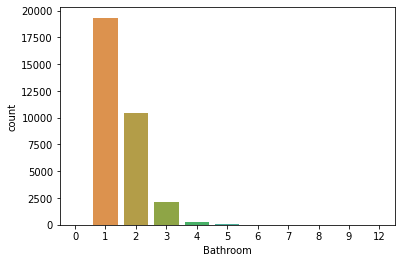

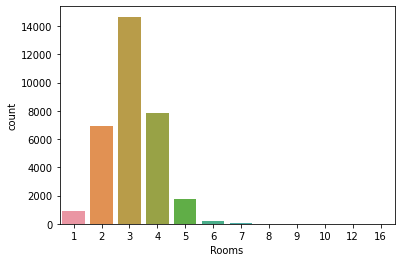

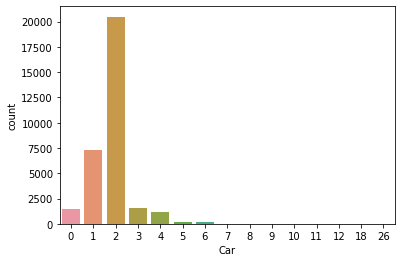

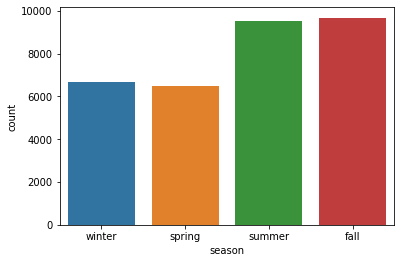

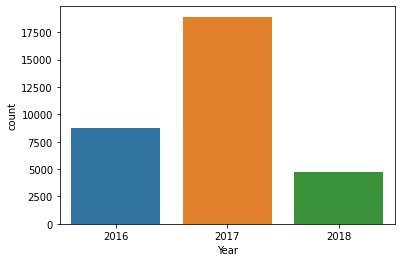

In [43]:
# ordinal 데이터 시각화

l= ['Bathroom', 'Rooms', 'Car', 'season', 'Year']
for i in l:
    plt.figure()
    sns.countplot(x=i, data=df)



*   Bathroom은 평균 1~2개가 있다
*   Rooms는 평균 2~4개가 있다
*   평균 2대의 차를 위한 공간이 있다.
*   2017년에 많은 부동산 판매가 이루어졌다.
*   여름이나 가을에 더 많은 부동산 판매가 이루어졌다
---



Text(0.5, 1.0, 'Rooms & Price')

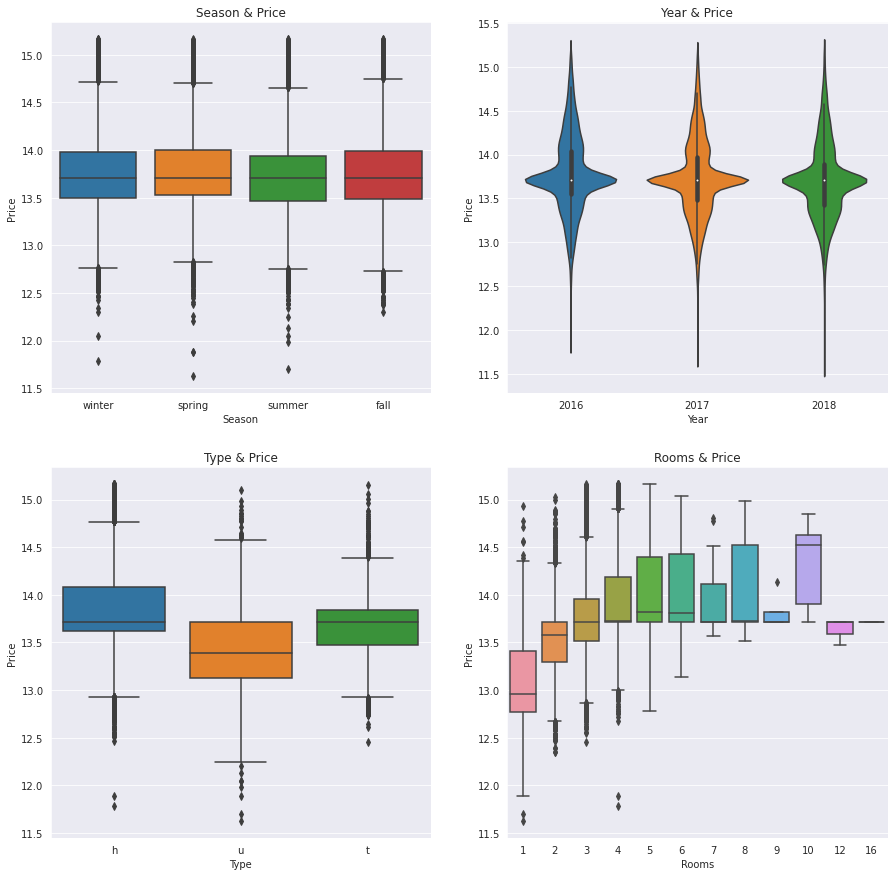

In [44]:
# 타겟에 영향을 미칠 수있는 feature 확인

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.violinplot(data = df, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(x = 'Rooms', y = 'Price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')

*   season이 부동산 가격에 큰 영향을 미치지 않는다.
*   Year도 가격에 큰 영향을 미치지 않는다.
*   Type은 h 가 더 비싸고 가격 변동이 더 많은 것처럼 보이는 것처럼 보인다. Type은 부동산 가격에 영향을 미치는 것 같다. 
*   더 많은 객실에 대해 가격이 약간 선형 적으로 증가하는 것 같다. 영향을 미친다.
---



##**3.2 Correlation matrix**

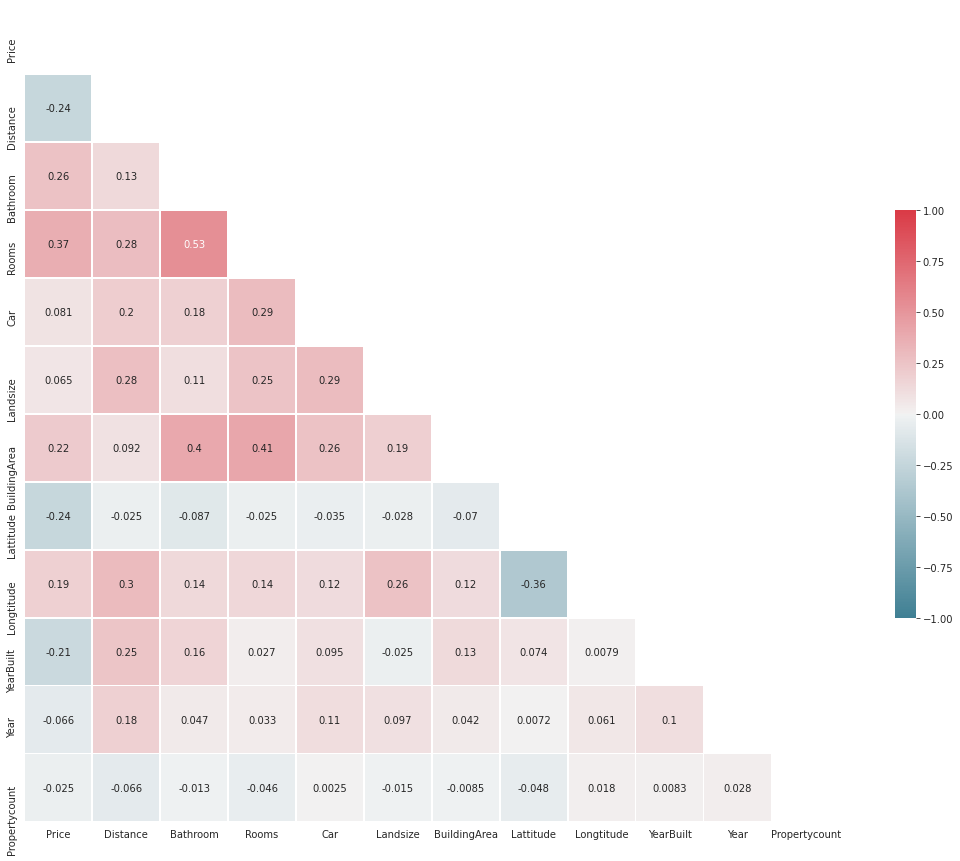

In [45]:
# Correlation matrix 만들기

attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'YearBuilt',
             'Year', 'Propertycount']
h= df[attributes]

#whitegrid
sns.set_style('whitegrid')

# Correation matrix 계산하기
corr_matrix=h.corr(method='spearman')


# 히트맵으로 표현하기
plt.figure(figsize=(20,15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Price와 다른 변수들관의 관계

* Rooms(.37)가 가장 높은 correaltion을 가지고 있다.
* Bathroom(.26), BuildingArea(.22)도 높은 correlation을 가지고 있다.
* Distance(-.24)와 Lattitude(-.024)가 가장 낮은 correlation을 가지고 있다.
* correlation이 0에 가까운 feature들은 price에 영향이 거의 없다고 볼 수 있다.


---





#**4. 머신러닝**

##**4.1 모델 학습 및 베이스라인모델과 성능 비교**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32341
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         32341 non-null  object        
 1   Address        32341 non-null  object        
 2   Rooms          32341 non-null  int64         
 3   Type           32341 non-null  object        
 4   Price          32341 non-null  float64       
 5   Method         32341 non-null  object        
 6   SellerG        32341 non-null  object        
 7   Date           32341 non-null  datetime64[ns]
 8   Distance       32341 non-null  float64       
 9   Postcode       32341 non-null  object        
 10  Bathroom       32341 non-null  int64         
 11  Car            32341 non-null  int64         
 12  Landsize       32341 non-null  float64       
 13  BuildingArea   32341 non-null  float64       
 14  YearBuilt      32341 non-null  int64         
 15  CouncilArea    3234

In [47]:
# Price에 전혀 영향을 미치지 않다고 생각하는 feature들 드랍시키기

# 교외이름,주소,판매방법,에이전트,날짜,우편주소,관청이 있는 지역, 판매 날짜, day of year

df= df.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'doy'], axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32341
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          32341 non-null  int64  
 1   Type           32341 non-null  object 
 2   Price          32341 non-null  float64
 3   Distance       32341 non-null  float64
 4   Bathroom       32341 non-null  int64  
 5   Car            32341 non-null  int64  
 6   Landsize       32341 non-null  float64
 7   BuildingArea   32341 non-null  float64
 8   YearBuilt      32341 non-null  int64  
 9   Lattitude      32341 non-null  float64
 10  Longtitude     32341 non-null  float64
 11  Regionname     32341 non-null  object 
 12  Propertycount  32341 non-null  float64
 13  Year           32341 non-null  int64  
 14  season         32340 non-null  object 
dtypes: float64(7), int64(5), object(3)
memory usage: 5.2+ MB


In [49]:
# 범주형 데이터를 onehot encoding

hD= pd.get_dummies(df, columns= ['Type', 'Regionname', 'season'])
hD_columns=hD.columns
hD.info(),hD_columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32341
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  32341 non-null  int64  
 1   Price                                  32341 non-null  float64
 2   Distance                               32341 non-null  float64
 3   Bathroom                               32341 non-null  int64  
 4   Car                                    32341 non-null  int64  
 5   Landsize                               32341 non-null  float64
 6   BuildingArea                           32341 non-null  float64
 7   YearBuilt                              32341 non-null  int64  
 8   Lattitude                              32341 non-null  float64
 9   Longtitude                             32341 non-null  float64
 10  Propertycount                          32341 non-null  float64
 11  Ye

(None, Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
        'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
        'Year', 'Type_h', 'Type_t', 'Type_u', 'Regionname_Eastern Metropolitan',
        'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
        'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
        'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
        'Regionname_Western Victoria', 'season_fall', 'season_spring',
        'season_summer', 'season_winter'],
       dtype='object'))

In [50]:
# 변수간의 단위차이가 크므로 scaling 하기 (outlier에 덜 민감한 robustscaler 사용)

scaler = RobustScaler()
hD= scaler.fit_transform(hD)

In [51]:
# 데이터를 나누기 위해 array에서 Dataframe으로 바꾸기

hD=pd.DataFrame(data=hD,columns=hD_columns)
hD.head()
hD_features=hD.drop(axis=1,columns='Price').columns

In [52]:
# 데이터 train,val,test로 나누기

train, test = train_test_split(hD, train_size=0.80, test_size=0.20, random_state=2)

train.shape, test.shape

((25872, 27), (6469, 27))

In [53]:
# featue와 target 으로 나누기

features = train.drop(columns=[target]).columns
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]




* **linear regression, decision trees 와 random forest 세 가지 머신러닝 방법을 사용하여 가격을 예측 할 것입니다.**





* **평가지표 : RSME**

In [54]:
# fitdecision trees
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

# fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [55]:
# 세 모델의 RMSE 출력

models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(X_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 0.64
RMSE of random forest = 0.26
RMSE of decision tree = 0.16


In [56]:
# 베이스라인 모델의 RMSE 출력

y= hD[target]
predict = y.mean()
y_pred = [predict] * len(y)
MSE = mean_squared_error(y, y_pred)
RMSE = np.sqrt(MSE)
msg = "%s = %.2f" % ('Baseline', round(RMSE, 2))
print('RMSE of', msg)

RMSE of Baseline = 0.88


In [57]:
# 세 모델의 정확도 구하기

models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]

from sklearn.metrics import mean_absolute_error
for i, model in models:
    scores = model.score(X_train,y_train)
    print('Accuracy of Train set',i,scores)

Accuracy of Train set lin_reg 0.4809067519003512
Accuracy of Train set random forest 0.916762765846532
Accuracy of Train set decision tree 0.9676769583249992


* **3가지 모델이 베이스라인보다 RMSE가 월등히 낮으므로 성능이 좋다.**

* **Random Forest 모델이 RMSE도 가장 낮고 정확도도 과적합하지 않으면서 가장 성능이 좋은 것 같다**

* **위 결과로만 어떤 모델이 확실히 성능이 더 좋다고 말 할 수 없음. 모델의 성능을 더 잘 이해하기 위해 교차 검증 사용**


##**4.2 교차 검증**

In [58]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]

In [59]:
results= []
metric= []
for name, model in models:
  scores = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
  results.append(scores)

In [60]:
results

[{'fit_time': array([0.02439237, 0.02562141, 0.02636695, 0.02525234, 0.02578187]),
  'score_time': array([0.00248241, 0.0023632 , 0.00232387, 0.00231123, 0.00227785]),
  'test_score': array([-0.40095351, -0.41618578, -0.48213366, -0.40598666, -0.4027137 ])},
 {'fit_time': array([11.85269213, 10.90300894, 10.59574723, 10.55372953, 10.59850597]),
  'score_time': array([0.20458174, 0.20399618, 0.20400834, 0.20418215, 0.20403385]),
  'test_score': array([-0.33967482, -0.33480295, -0.34386714, -0.33728154, -0.33125427])},
 {'fit_time': array([0.20573664, 0.20081735, 0.20347142, 0.20699906, 0.21258855]),
  'score_time': array([0.00352359, 0.00381684, 0.00366473, 0.00407743, 0.00421834]),
  'test_score': array([-0.5737323 , -0.58574871, -0.58736073, -0.60267217, -0.56772685])}]

In [61]:
#Linear regression
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()

#RandomForest
RF_RMSE_mean = np.sqrt(-results[1]['test_score'].mean())
RF_RMSE_std= results[1]['test_score'].std()

#DecisionTree
DT_RMSE_mean = np.sqrt(-results[2]['test_score'].mean())
DT_RMSE_std= results[2]['test_score'].std()

In [62]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
        }, columns = ['Model', 'RMSE_mean', 'RMSE_std'])

modelDF

,Model,RMSE_mean,RMSE_std
0,Linear Regression,0.649303,0.030726
1,Random Forest,0.580841,0.004278
2,Decision Trees,0.763838,0.012097


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


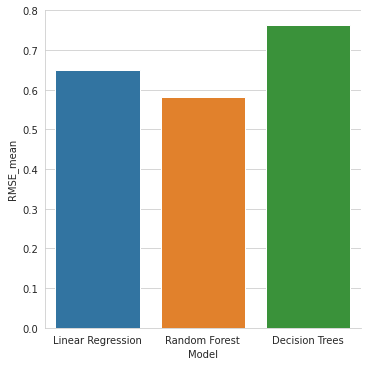

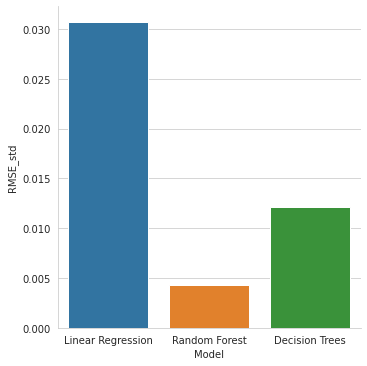

In [63]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True')
sns.factorplot(x= 'Model', y= 'RMSE_std', data= modelDF, kind='bar', legend='True')

* **Cross-validation에서 Random Forest model이 RMSE와 RMSE_std가 낮음 - 더 좋은 성능**

* **hold-out 교차검증과 Cross-validation 두 검증 모두에서 RandomForest모델이 더 좋은 성능을 보임**

* **RandomFrest 모델을 이용하여 하이퍼파라미터 적용**

##**4.3 Randomized search**

Random Forest의 가장 중요한 하이퍼 파라미터:


* n_estimators = n of trees
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [65]:
# 파라미터 범위 조정

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]

min_samples_split = [5, 10]

dists  = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}


In [66]:
clf = RandomizedSearchCV(estimator = forest, param_distributions = dists, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

# 학습하기
clf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [67]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MSE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'n_estimators': 110, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45}
MSE:  0.3148617971066622


In [68]:
# 만들어진 모델에거 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

In [69]:
# 이제 새 모델의 Accuracy 와 RMSE의 성능 메트릭에 대해 알아 보겠습니다.

# Accuracy

print('The best model from the randomized search has a Accuracy of',pipe.score(X_train,y_train))

The best model from the randomized search has a Accuracy of 0.8030505668218678


In [70]:
# RMSE

y_pred = pipe.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print('The best model from the randomized search has a RMSE of',rmse)

The best model from the randomized search has a RMSE of 0.39226621144848456


##**4.4 Feature importance**

In [71]:
# Randomized search에서 중요도 값 추출

importances = clf.best_estimator_.feature_importances_


# feautre column리스트 만들기 (Price 제외)
feature_list = list(hD_features)

# 값과 콜론명 합치기
feature_importance= sorted(zip(importances, feature_list), reverse=True)

# 표로 만들기
FI = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(FI['importance'])
feature= list(FI['feature'])

print(FI)

    importance                                feature
0     0.131828                               Distance
1     0.109815                                  Rooms
2     0.101210                              Lattitude
3     0.088900       Regionname_Southern Metropolitan
4     0.088056                             Longtitude
5     0.073860                                 Type_u
6     0.060167                                 Type_h
7     0.058595                               Landsize
8     0.056242                          Propertycount
9     0.043500                           BuildingArea
10    0.039644                              YearBuilt
11    0.037828                               Bathroom
12    0.017326        Regionname_Western Metropolitan
13    0.015136                                    Car
14    0.013987        Regionname_Eastern Metropolitan
15    0.013640       Regionname_Northern Metropolitan
16    0.012140                                   Year
17    0.009530              

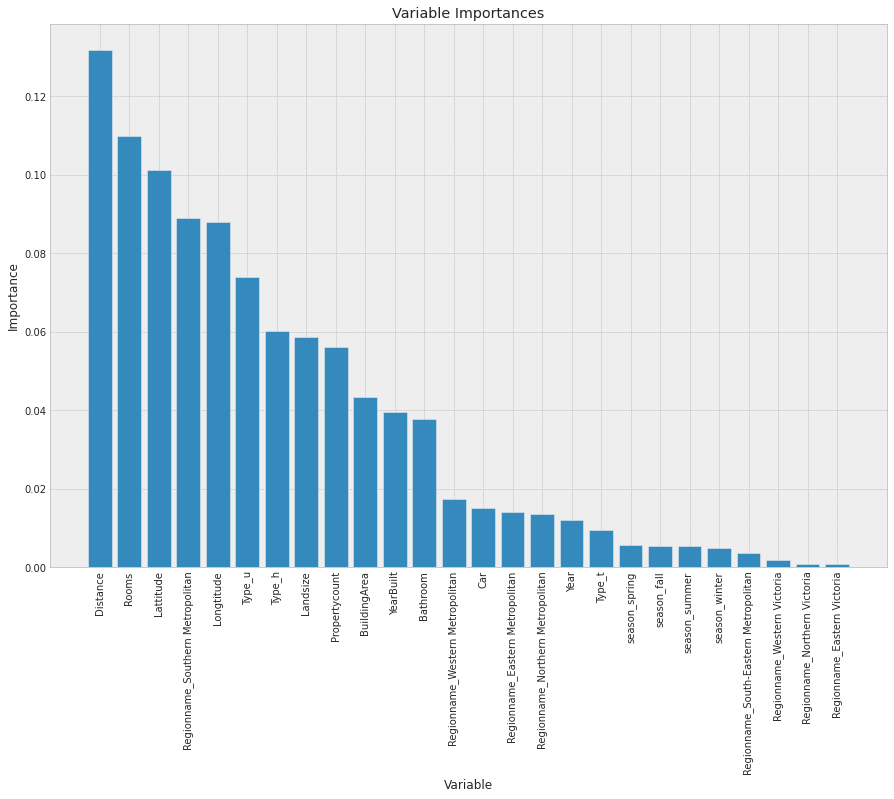

In [72]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Feature importance 결과:**
* distance가 가장 높음
* 그 다음으로는 Rooms,Lattitude,Regioname_southem Metropolitan, Longtite 순으로 중요도가 높습니다.
* Regioname_southem Metropolitan은 Regionmame에서 원핫인코딩으로 나온 피처입니다
* season이나 year는 영향이 거의 없습니다.
* 전체적으로 집의 크기나 집의 위치가 Price에 영향을 많이 줍니다.

##**4.4 최상의 모델과 이전 세 모델의 비교 및 평가**

In [73]:
# RMSE

models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(X_test)
    MSE = mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 0.63
RMSE of random forest = 0.58
RMSE of decision tree = 0.77


In [74]:

final_model = clf.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.56


* **최상의 모델에서 RMSE가 가장 작아짐 - 성능이 높아졌다.**


---



In [75]:
# Train set Accuracy

models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]

from sklearn.metrics import mean_absolute_error
for i, model in models:
    scores = model.score(X_train,y_train)
    print('Accuracy of Train set',i,scores)

Accuracy of Train set lin_reg 0.4809067519003512
Accuracy of Train set random forest 0.916762765846532
Accuracy of Train set decision tree 0.9676769583249992


In [76]:
print("Test set Accuracy",final_model.score(X_train,y_train))

Test set Accuracy 0.8030505668218678


* **최상의 모델의 train set 정확도가 80%로 내려가 과적합을 피했다.**


---



In [77]:
# test set Accuracy

models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]

from sklearn.metrics import mean_absolute_error
for i, model in models:
    scores = model.score(X_test,y_test)
    print('Accuracy of Train set',i,scores)

Accuracy of Train set lin_reg 0.48832597452415516
Accuracy of Train set random forest 0.568167508728866
Accuracy of Train set decision tree 0.2318131107710899


In [78]:
# Accuracy

Te=final_model.score(X_test,y_test)

print("Test set Accuracy",Te)

Test set Accuracy 0.5976798056988604


* **최상의 모델의 Test set의 정확도가 60%로 높지는 않지만 다른 모델들 보다 정확도가 상승했다.**


---



#**5. 가설검정**

프로젝트의 가설인 '멜버른 부동산가격은 부동산의 위치보다 부동산의 크기에 더 영향을 받는다'는 기각되지 않는다.

부동산의 크기도 집값에 영향을 주지만 전체적으로 부동산의 위치와 관련된 특성이 멜버른의 부동산 가격에 더 영향을 미친다.

 Ex) distance, Lattitude, Regionname ,Longtitude